In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [3]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w"]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-150w_10_.pcap")
pcap_file.append("caida0517-070w_10_.pcap")
pcap_file.append("caida0517-030w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-070w_10_.pcap") 
pcap_file.append("zipf2a-030w_10_.pcap") 
pcap_file.append("zipf10-070w_10_.pcap") 
pcap_file.append("zipf10-030w_10_.pcap") 

### caida + zipf2a [10:25]
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + caida [25:40]
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf10 [40:50]
for a in caida0517:
    for b in zipf10:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + caida [50:60]
for a in zipf10:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + zipf10 [60:66]
for a in zipf2a:
    for b in zipf10:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + zipf2a [66:72]
for a in zipf10:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [72:92]
for a in caida0517:
    for b in caida0517:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + zipf2a [92:98]
for a in zipf2a:
    for b in zipf2a:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + zipf10 [98:100]
for a in zipf10:
    for b in zipf10:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
        
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-150w_10_.pcap', 'caida0517-070w_10_.pcap', 'caida0517-030w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-070w_10_.pcap', 'zipf2a-030w_10_.pcap', 'zipf10-070w_10_.pcap', 'zipf10-030w_10_.pcap', 'caida0517-500w_6_zipf2a-150w_4.pcap', 'caida0517-500w_6_zipf2a-070w_4.pcap', 'caida0517-500w_6_zipf2a-030w_4.pcap', 'caida0517-250w_6_zipf2a-150w_4.pcap', 'caida0517-250w_6_zipf2a-070w_4.pcap', 'caida0517-250w_6_zipf2a-030w_4.pcap', 'caida0517-150w_6_zipf2a-150w_4.pcap', 'caida0517-150w_6_zipf2a-070w_4.pcap', 'caida0517-150w_6_zipf2a-030w_4.pcap', 'caida0517-070w_6_zipf2a-150w_4.pcap', 'caida0517-070w_6_zipf2a-070w_4.pcap', 'caida0517-070w_6_zipf2a-030w_4.pcap', 'caida0517-030w_6_zipf2a-150w_4.pcap', 'caida0517-030w_6_zipf2a-070w_4.pcap', 'caida0517-030w_6_zipf2a-030w_4.pcap', 'zipf2a-150w_6_caida0517-500w_4.pcap', 'zipf2a-150w_6_caida0517-250w_4.pcap', 'zipf2a-150w_6_caida0517-150w_4.pcap', 'zipf2a-150w_6_caida0517-070w_4.pcap', 'zi

In [4]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [5]:
def read_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQueryOfflineNew/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [6]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

In [7]:
def prepare_testing_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_gt_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [8]:
def prepare_testing_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQuery/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [9]:
def prepare_profiler_offline_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200):
    
    profiler_fsd = {}
    
    for d in datasets:
        profiler_fsd[d[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOfflineNew/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, "single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [10]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [11]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    
    return avg_fsd


In [12]:
def get_fsd_dict(dataset):
    fsd = {}
    with open(dataset, "r") as file:
        for line in file:
            items = line.strip().split(" ")
            fsd[int(items[0])] = int(items[1])
    
    sorted_fsd = dict(sorted(list(fsd.items())))
    
    return sorted_fsd

In [13]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}

In [41]:
def plot_gt_fsd_with_diff_mem(dataset, widths):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    file_path = pcap_folder + dataset[:-9] + '.txt'
    all_fsd['GT'] = get_fsd_dict(file_path)
    
    # for w in widths:
    #     fsds = read_single_window_gt_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
    #                                                 epochs=['10'], dataset=dataset, window_size=200)
    #     all_fsd[f'Mem={int(w*16/1024)}KB-GT'] = get_avg_fsd(fsds)
    
    for w in widths:
        fsds = read_single_window_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=dataset, window_size=200)
        all_fsd[f'Mem={int(w*16/1024)}KB'] = get_avg_fsd(fsds)
        
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=(3 if labels[i][-2:]=='GT' else 2))
    plt.title(f'CDF of {dataset[:-9]}')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right", ncol=2)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

In [15]:
def plot_gt_fsd_with_diff_fsd(datasets, width):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # Prepare origin fsd
    # pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    # file_path = pcap_folder + dataset[:-9] + '.txt'
    # all_fsd['GT'] = get_fsd_dict(file_path)
    
    # for d in datasets:
    #     fsds = read_single_window_gt_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
    #                                                 epochs=['10'], dataset=d, window_size=200)
    #     all_fsd[d[:-9]] = get_avg_fsd(fsds)
    
    for d in datasets:
        fsds = read_single_window_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=d, window_size=200)
        all_fsd[d[:-9]] = get_avg_fsd(fsds)
        
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=2)
    plt.title(f'CDF of {int(width*16/1024)}KB')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right", ncol=2)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim(0, 100000)
    plt.xticks([1, 10, 100, 1000, 10000, 100000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

/tmp/ipykernel_14119/2897470324.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


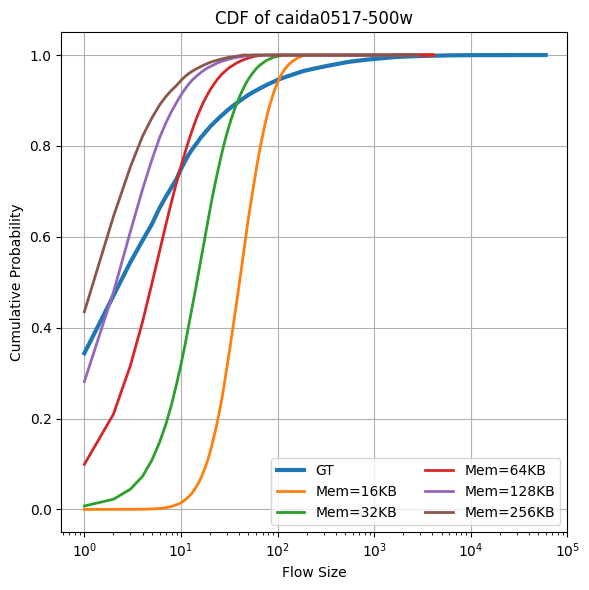

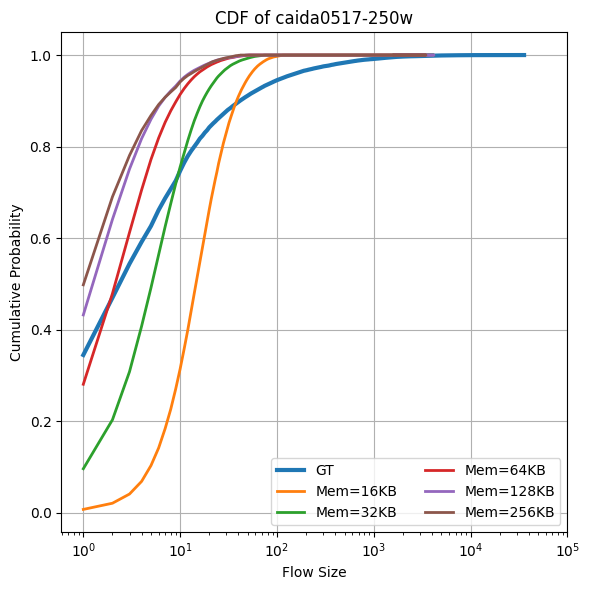

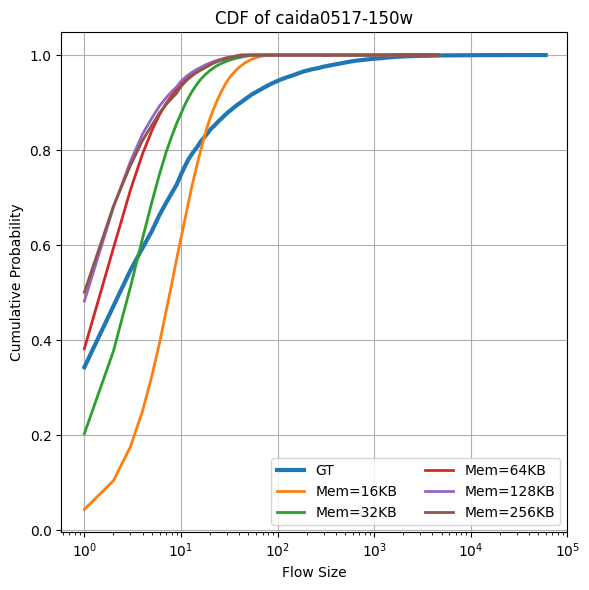

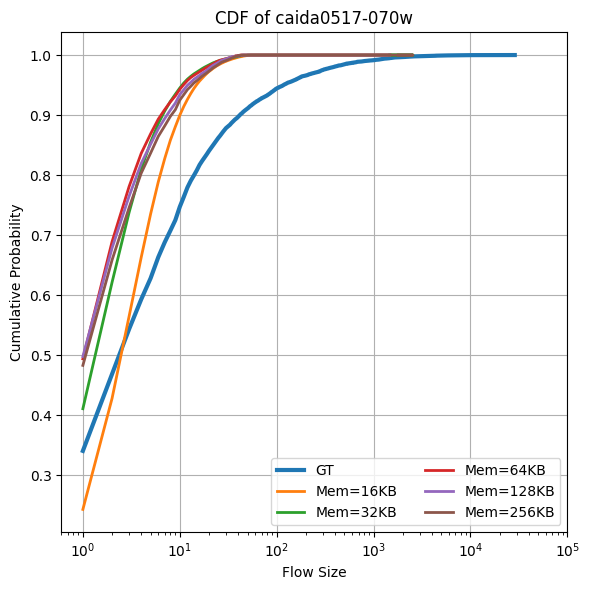

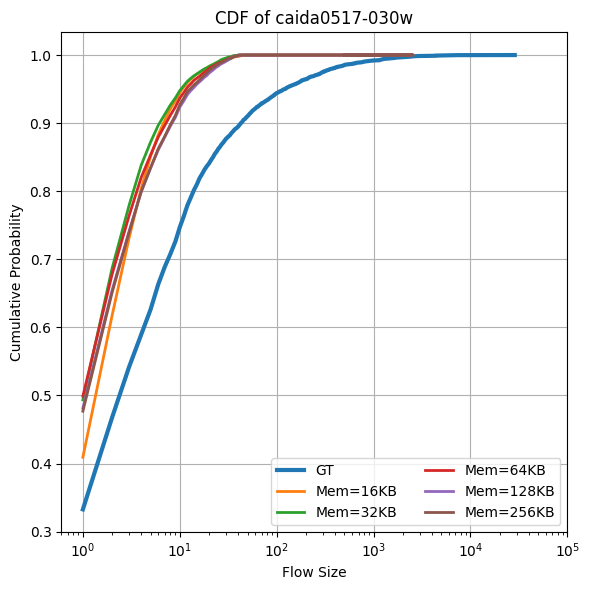

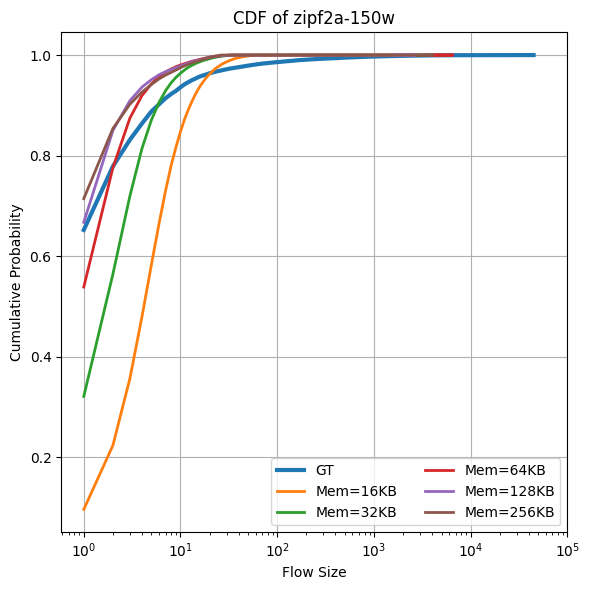

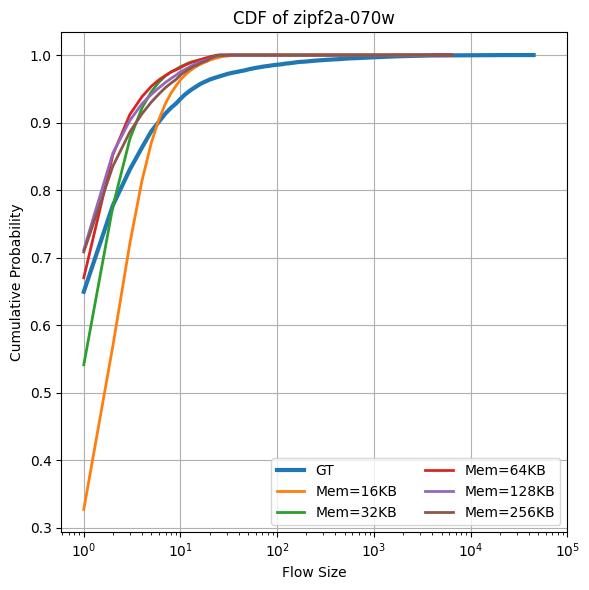

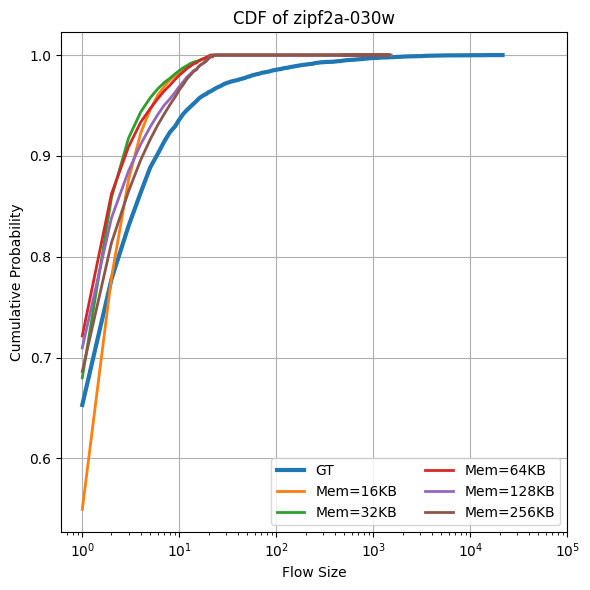

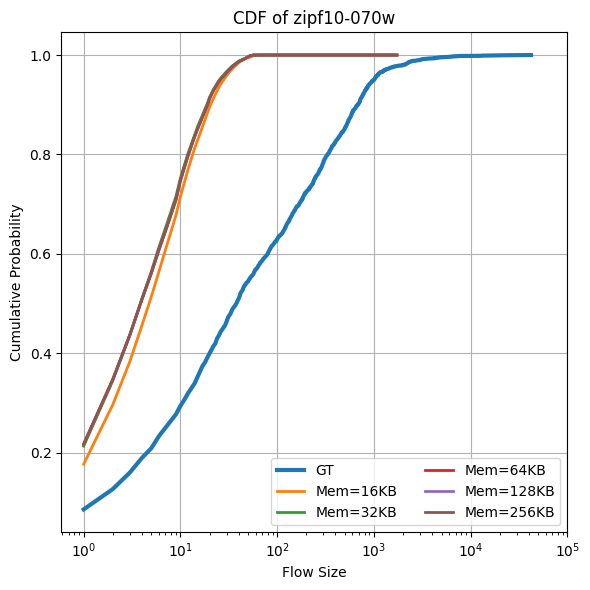

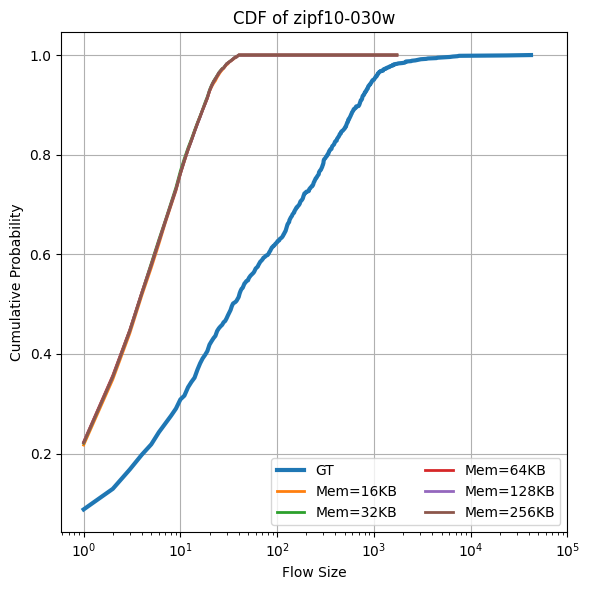

In [42]:
for i in range(10):
    plot_gt_fsd_with_diff_mem(dataset=pcap_file[i], widths=[1024, 2048, 4096, 8192, 16384])
    
# for w in [1024, 2048, 4096, 8192, 16384]:
#     plot_gt_fsd_with_diff_fsd(datasets=pcap_file[:10], width=w)

In [17]:
def plot_mrd_with_diff_mem(datasets, widths):
    
    testing_fsd = {}
    testing_gt_avg_fsd = {}
        
    for w in widths:
        # prepare testing avg fsd
        testing_fsd[w] = {}
        testing_fsd[w] = prepare_testing_fsd_data(datasets=datasets, width=w)
            
        # prepare testing gt avg fsd
        testing_gt_avg_fsd[w] = {}
        testing_gt_fsd = prepare_testing_gt_fsd_data(datasets=datasets, width=w)
        for name, fsd_list in testing_gt_fsd.items():
            testing_gt_avg_fsd[w][name] = get_avg_fsd(fsd_list)
        
    MRDs = []
    # cal by avg mrd
    for d in datasets:
        single_MRDs = []
        for w in widths:
            total_mrd = 0.0
            for fsd in testing_fsd[w][d[:-9]]:
                total_mrd += calculate_mrd(testing_gt_avg_fsd[w][d[:-9]], fsd)
            single_MRDs.append(round(total_mrd/len(testing_fsd[w][d[:-9]]), 2))
        MRDs.append(single_MRDs)
        
    xticks = [f'{int(w*16/1024)}KB' for w in widths]
    labels = list(testing_fsd[widths[0]].keys())
    colors = {'caida0517':'tab:green', 'zipf2a': 'tab:orange', 'zipf10':'tab:blue'}
    markers = {'500w':'o', '250w':'^', '150w':'s', '070w':'X', '030w':'D'}
    
    plt.figure(figsize=(10, 6))
    
    for i in range(len(MRDs)):
        plt.plot(MRDs[i], label=labels[i], color=colors[labels[i].split("-")[0]], marker=markers[labels[i].split("-")[1]], linewidth=2)
    
    plt.xlabel('Memory')
    plt.ylabel('WMRD')
    plt.title(f'MRD Variation between EST-FSD and GT-FSD')
    plt.xticks(np.arange(len(xticks)), xticks)
    plt.legend(loc='upper right', ncol=math.ceil(len(MRDs)/5))
    plt.grid()

    # Show the plot
    plt.show()
    

In [18]:
def plot_gt_mrd_with_diff_mem(datasets, widths):
    
    testing_fsd = {}
    testing_gt_avg_fsd = {}
    
    # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    
    for w in widths:
        # prepare testing avg fsd
        testing_fsd[w] = {}
        testing_fsd[w] = prepare_testing_fsd_data(datasets=datasets, width=w)
            
        # # prepare testing gt avg fsd
        # testing_gt_avg_fsd[w] = {}
        # testing_gt_fsd = prepare_testing_gt_fsd_data(datasets=datasets, width=w)
        # for name, fsd_list in testing_gt_fsd.items():
        #     testing_gt_avg_fsd[w][name] = get_avg_fsd(fsd_list)
        
    MRDs = []
    # cal by avg mrd
    for d in datasets:
        single_MRDs = []
        GT_fsd = get_fsd_dict(pcap_folder+d[:-9]+'.txt')
        for w in widths:
            total_mrd = 0.0
            for fsd in testing_fsd[w][d[:-9]]:
                total_mrd += calculate_mrd(normalize_fsd(GT_fsd), normalize_fsd(fsd))
            single_MRDs.append(round(total_mrd/len(testing_fsd[w][d[:-9]]), 2))
        MRDs.append(single_MRDs)
        
    xticks = [f'{int(w*16/1024)}KB' for w in widths]
    labels = list(testing_fsd[widths[0]].keys())
    colors = {'caida0517':'tab:green', 'zipf2a': 'tab:orange', 'zipf10':'tab:blue'}
    markers = {'500w':'o', '250w':'^', '150w':'s', '070w':'X', '030w':'D'}
    
    plt.figure(figsize=(10, 6))
    
    for i in range(len(MRDs)):
        plt.plot(MRDs[i], label=labels[i], color=colors[labels[i].split("-")[0]], marker=markers[labels[i].split("-")[1]], linewidth=2)
    
    plt.xlabel('Memory')
    plt.ylabel('WMRD')
    plt.title(f'MRD Variation between EST-FSD and GT-FSD')
    plt.xticks(np.arange(len(xticks)), xticks)
    plt.legend(loc='upper right', ncol=math.ceil(len(MRDs)/5))
    plt.grid()

    # Show the plot
    plt.show()
    

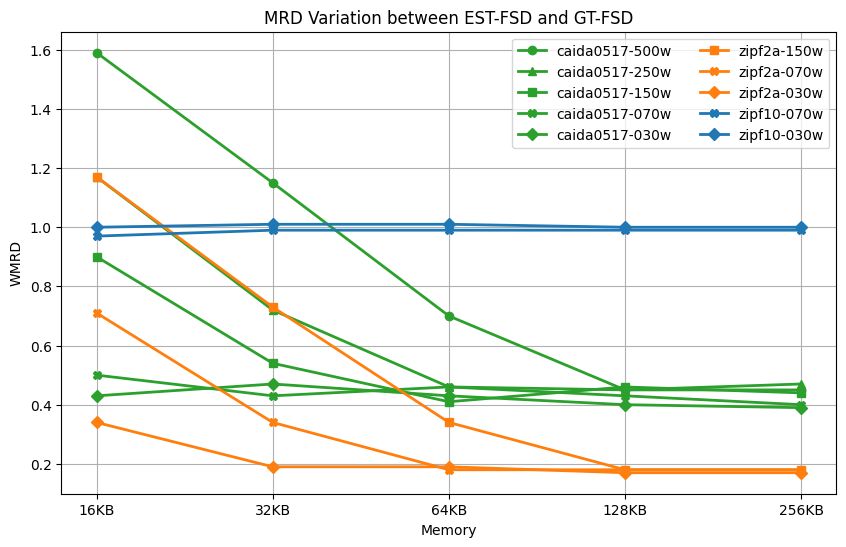

In [19]:
# plot_mrd_with_diff_mem(datasets=pcap_file[:10], widths=[1024, 2048, 4096, 8192, 16384])
plot_gt_mrd_with_diff_mem(datasets=pcap_file[:10], widths=[1024, 2048, 4096, 8192, 16384])

---

In [20]:
def plot_offline_fsd_with_diff_mem(dataset, widths):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # Prepare origin fsd
    # pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    # file_path = pcap_folder + dataset[:-9] + '.txt'
    # all_fsd['GT'] = get_fsd_dict(file_path)
    
    for w in widths:
        fsds = read_offline_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=dataset, window_size=200)
        all_fsd[f'Mem={int(w*16/1024)}KB-Off'] = get_avg_fsd(fsds)
    
    for w in widths:
        fsds = read_single_window_fsd_data(algo='cm', row=3, width=w, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=dataset, window_size=200)
        all_fsd[f'Mem={int(w*16/1024)}KB'] = get_avg_fsd(fsds)
        
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=(3 if labels[i][-3:] == 'Off' else 2))
    plt.title(f'CDF of {dataset[:-9]}')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right", ncol=2)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim([-10,100000])
    plt.xticks([1, 10, 100, 1000, 10000, 100000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

In [21]:
def plot_offline_fsd_with_diff_fsd(datasets, width):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # Prepare origin fsd
    # pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    # file_path = pcap_folder + dataset[:-9] + '.txt'
    # all_fsd['GT'] = get_fsd_dict(file_path)
    
    for d in datasets:
        fsds = read_offline_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
                                                    epochs=['10'], dataset=d, window_size=200)
        all_fsd[d[:-9]] = get_avg_fsd(fsds)
    
    # for d in datasets:
    #     fsds = read_single_window_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
    #                                                 epochs=['10'], dataset=d, window_size=200)
    #     all_fsd[d[:-9]] = get_avg_fsd(fsds)
        
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=2)
    plt.title(f'CDF of {int(width*16/1024)}KB')
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right", ncol=2)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim(0, 100000)
    plt.xticks([1, 10, 100, 1000, 10000, 100000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
        

/tmp/ipykernel_14119/3036286736.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([-10,100000])


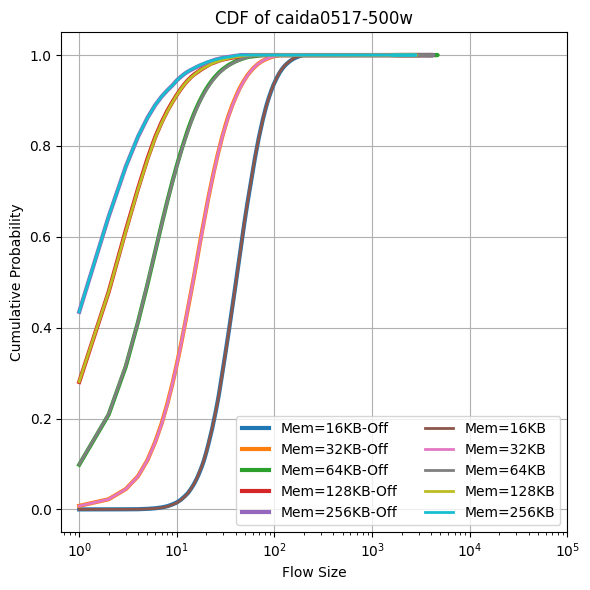

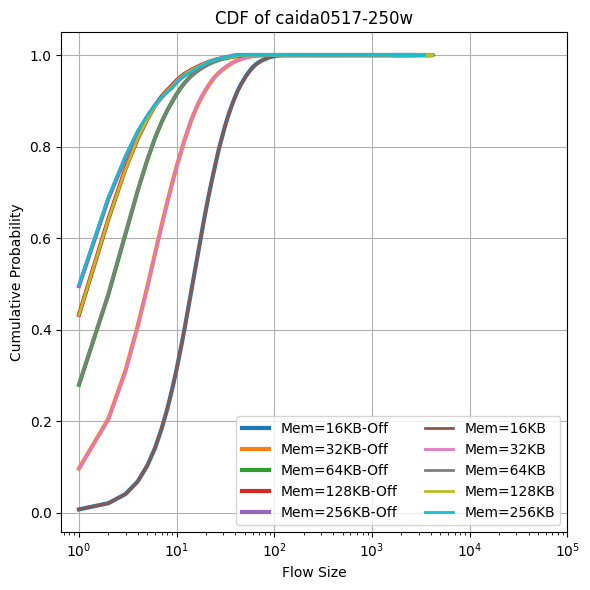

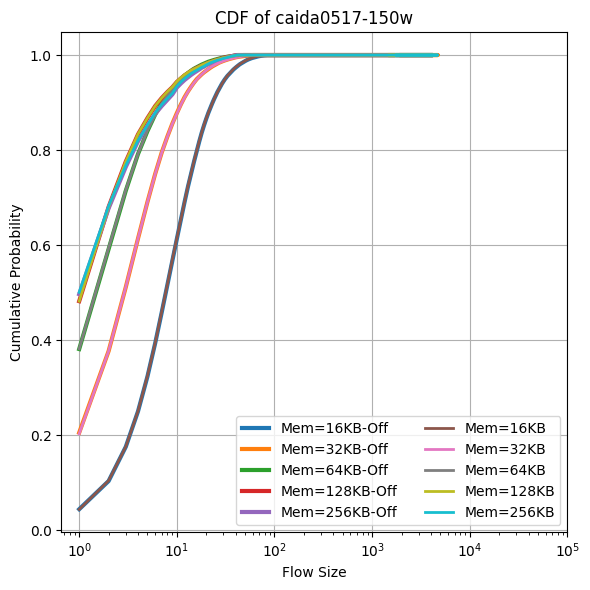

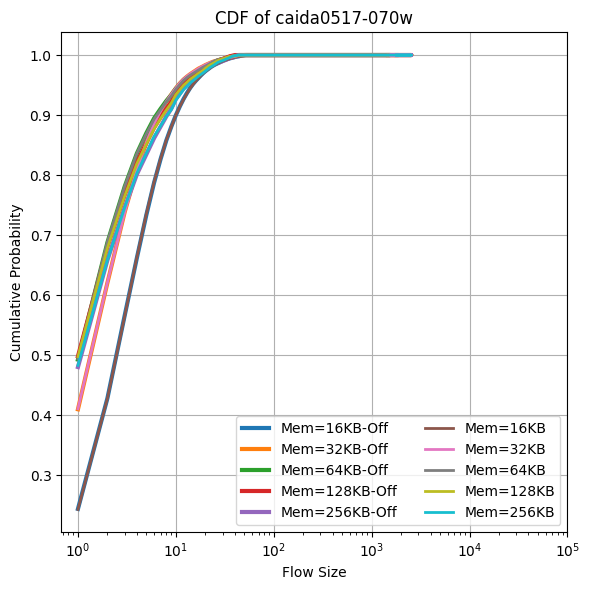

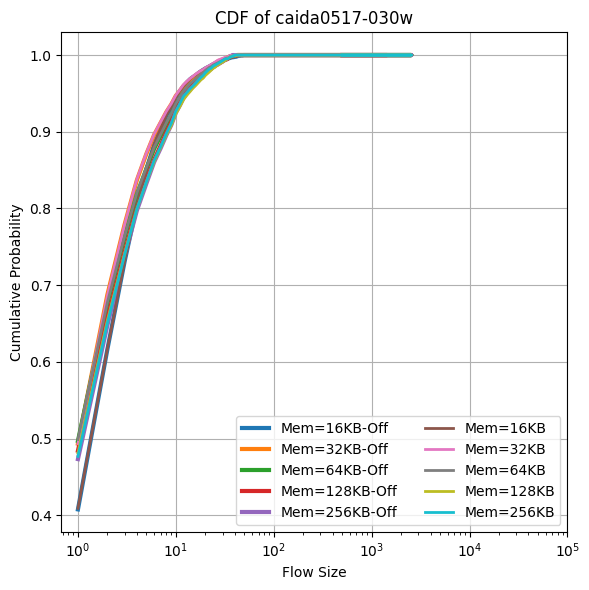

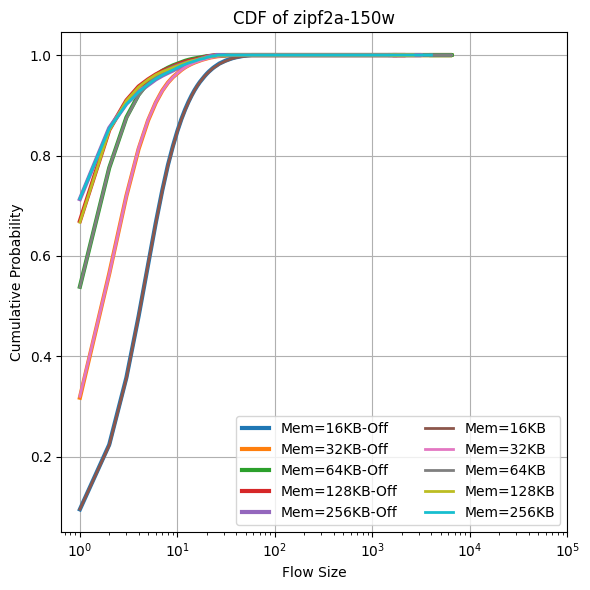

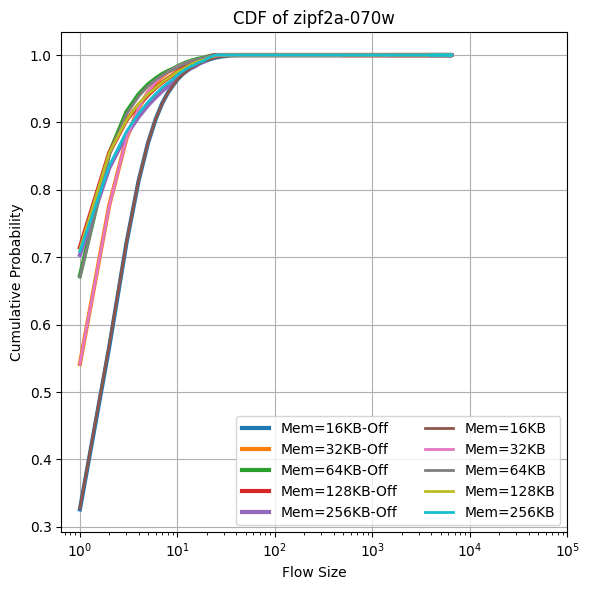

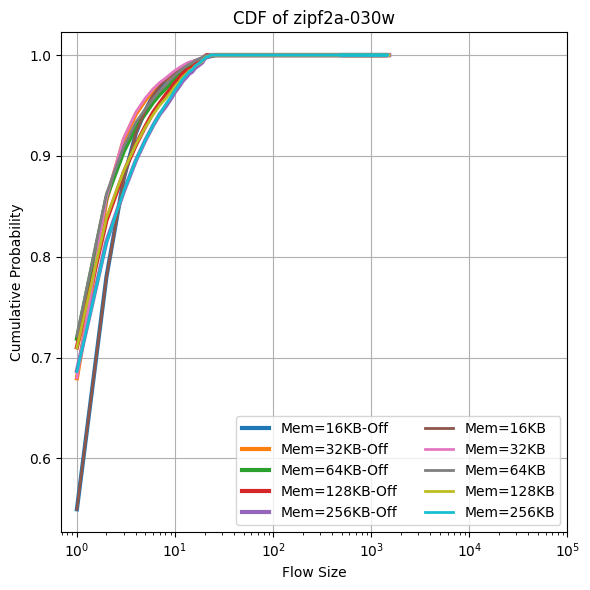

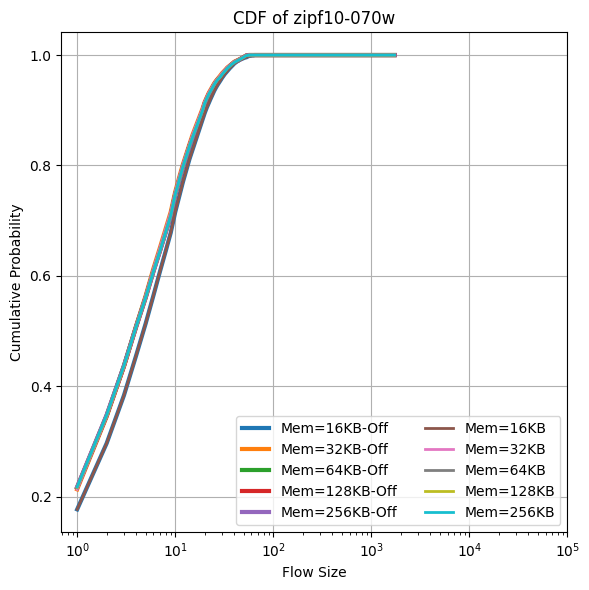

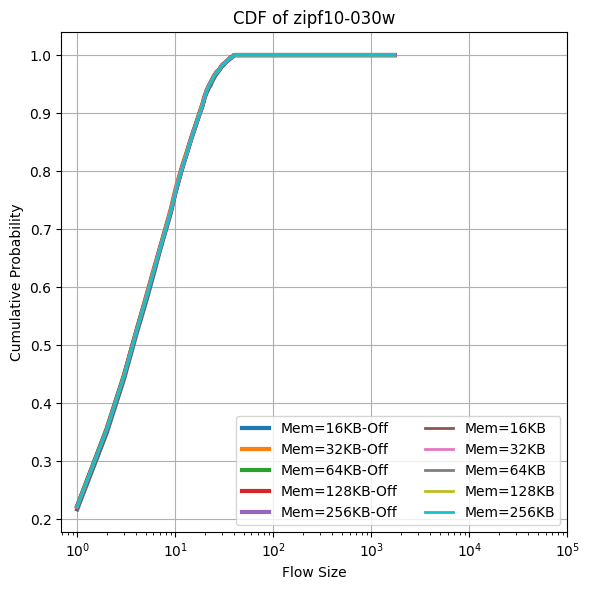

In [22]:
for i in range(10):
    plot_offline_fsd_with_diff_mem(dataset=pcap_file[i], widths=[1024, 2048, 4096, 8192, 16384])
# for w in [1024, 2048, 4096, 8192, 16384]:
#     plot_offline_fsd_with_diff_fsd(datasets=pcap_file[:10], width=w)

In [38]:
def plot_dirty_mrd_with_diff_mem(datasets, widths):
    
    testing_fsd = {}
    profiler_offline_avg_fsd = {}
        
    for w in widths:
        # prepare testing fsd
        testing_fsd[w] = {}
        testing_fsd[w] = prepare_testing_fsd_data(datasets=datasets, width=w)
            
        # prepare profiler offline avg fsd
        profiler_offline_avg_fsd[w] = {}
        profiler_offline_fsd = prepare_profiler_offline_fsd_data(datasets=datasets, width=w)
        for name, fsd_list in profiler_offline_fsd.items():
            profiler_offline_avg_fsd[w][name] = get_avg_fsd(fsd_list)
        
    MRDs = []
    # # cal by avg fsd
    # for d in datasets:
    #     single_MRDs = []
    #     for w in widths:
    #         single_MRDs.append(round(calculate_mrd(profiler_offline_avg_fsd[d[:-9]][w], testing_avg_fsd[d[:-9]][w]), 2))
    #     MRDs.append(single_MRDs)
        
    # cal by avg mrd
    for d in datasets:
        single_MRDs = []
        for w in widths:
            total_mrd = 0.0
            for fsd in testing_fsd[w][d[:-9]]:
                total_mrd += calculate_mrd(normalize_fsd(profiler_offline_avg_fsd[w][d[:-9]]), normalize_fsd(fsd))
            single_MRDs.append(round(total_mrd/len(testing_fsd[w][d[:-9]]), 2))
        MRDs.append(single_MRDs)
        
    xticks = [f'{int(w*16/1024)}KB' for w in widths]
    labels = list(testing_fsd[widths[0]].keys())
    colors = {'caida0517':'tab:green', 'zipf2a': 'tab:orange', 'zipf10':'tab:blue'}
    markers = {'500w':'o', '250w':'^', '150w':'s', '070w':'X', '030w':'D'}
    
    plt.figure(figsize=(10, 6))
    
    for i in range(len(MRDs)):
        plt.plot(MRDs[i], label=labels[i], color=colors[labels[i].split("-")[0]], marker=markers[labels[i].split("-")[1]], linewidth=2)
    
    plt.xlabel('Memory')
    plt.ylabel('WMRD')
    plt.title(f'MRD Variation between EST-FSD and DIRTY-FSD')
    plt.xticks(np.arange(len(xticks)), xticks)
    plt.ylim(0,0.4)
    plt.legend(loc='upper right', ncol=math.ceil(len(MRDs)/5))
    plt.grid()

    # Show the plot
    plt.show()
    

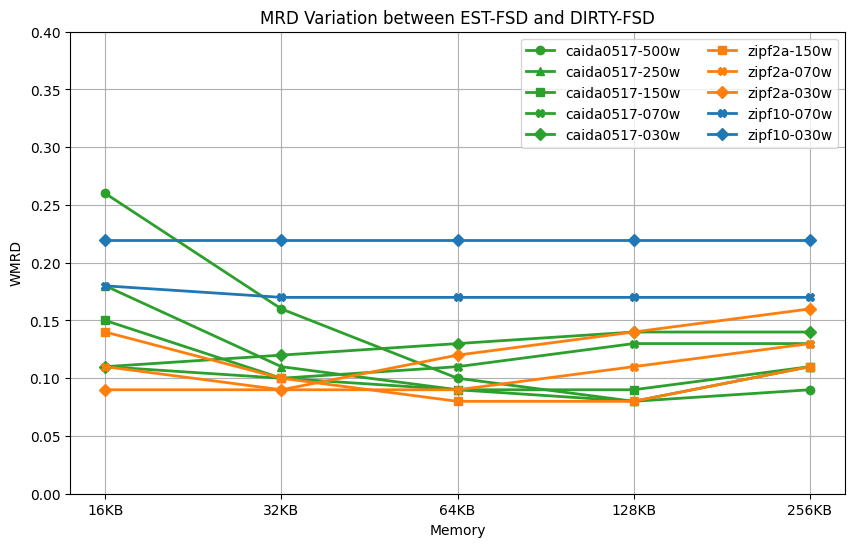

In [39]:
plot_dirty_mrd_with_diff_mem(datasets=pcap_file[:10], widths=[1024, 2048, 4096, 8192, 16384])

---

In [56]:
def plot_fsd(datasets, width):
    
    fs = []
    prob = []
    cdfs = []
    labels = []
    all_fsd = {}
    
    # Prepare origin fsd
    pcap_folder = "/home/ming/SketchMercator/pattern_detection/traffic_generator/fs_dist_new/"
    colors = {'caida0517':'tab:blue', 'zipf2a':'tab:orange', 'zipf10':'tab:green'}
    
    for d in datasets:
        file_path = pcap_folder + d[:-9] + '.txt'
        all_fsd[f'{d[:-9]}-GT'] = get_fsd_dict(file_path)
           
    # for d in datasets:
    #     fsds = read_offline_fsd_data(algo='cm', row=3, width=width, level=1, seed=1, count=1, flowkey='srcIP', 
    #                                                 epochs=['10'], dataset=d, window_size=200)
    #     all_fsd[d[:-9]] = get_avg_fsd(fsds)
        
    
    for name, fsd in all_fsd.items(): 
        flow_size = list(fsd.keys())
        frequency = list(fsd.values()) 

        total_flows = sum(frequency)
        probabilities = [freq / total_flows for freq in frequency]
        
        cdf = np.cumsum(probabilities)
        
        fs.append(flow_size)
        prob.append(probabilities)
        cdfs.append(cdf)
        labels.append(name)
    
    plt.figure(figsize=(6, 6))
    # Plot CDF
    plt.title(f'CDF of {int(width*16/1024)}KB')
    # plt.title(f'CDF of GT')
    for i in range(len(fs)):
        plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=2, color=colors[labels[i].split("-")[0]])
        # plt.plot(fs[i], cdfs[i], label = labels[i], linewidth=2)
    plt.xlabel('Flow Size')
    plt.ylabel('Cumulative Probability')
    plt.legend(loc="lower right", ncol=2)
    
    plt.xscale('log')  # Set x-axis scale to logarithmic
    plt.xlim(0, 100000)
    plt.xticks([1, 10, 100, 1000, 10000, 100000])  # Set specific tick positions

    plt.grid(True)
    
    
    plt.tight_layout()
    plt.show()
    

/tmp/ipykernel_14119/528015460.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 100000)


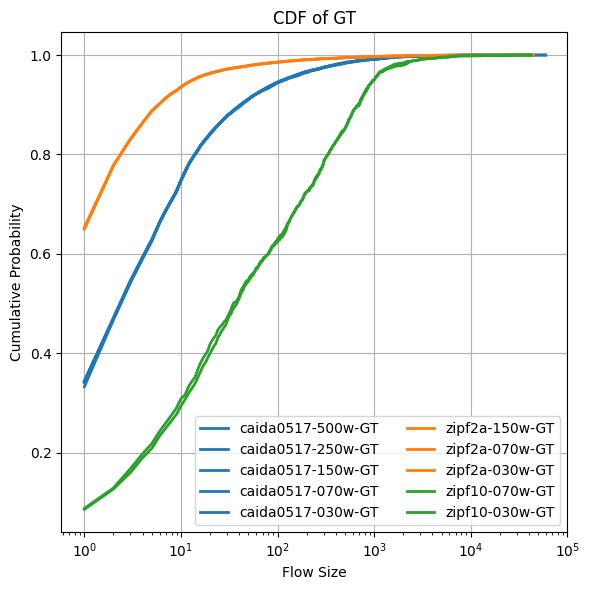

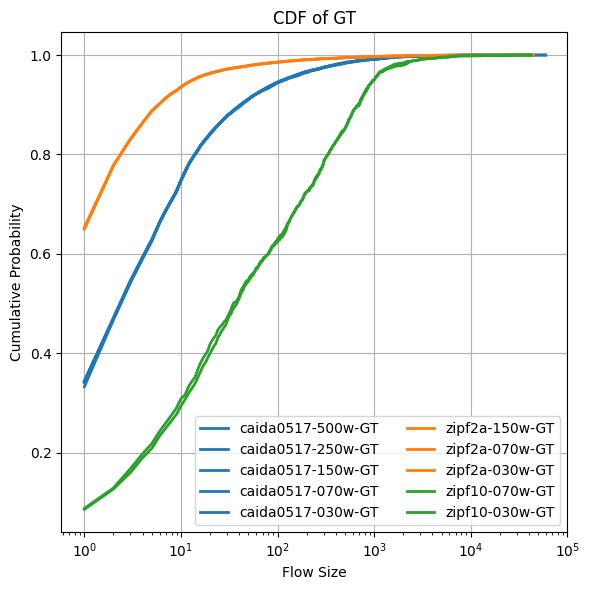

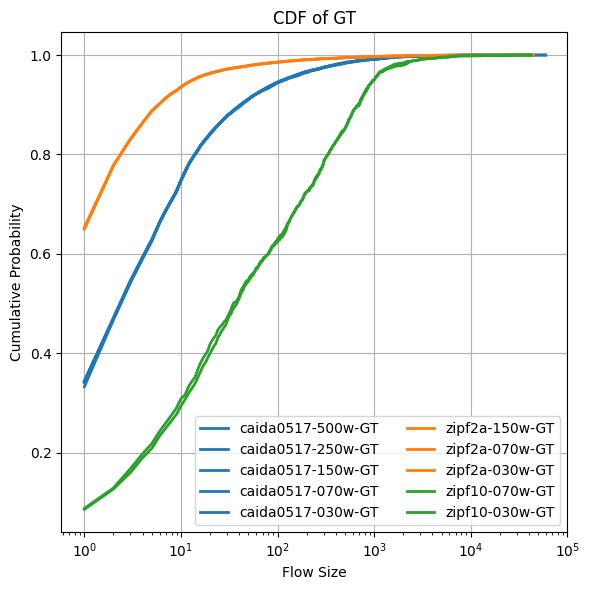

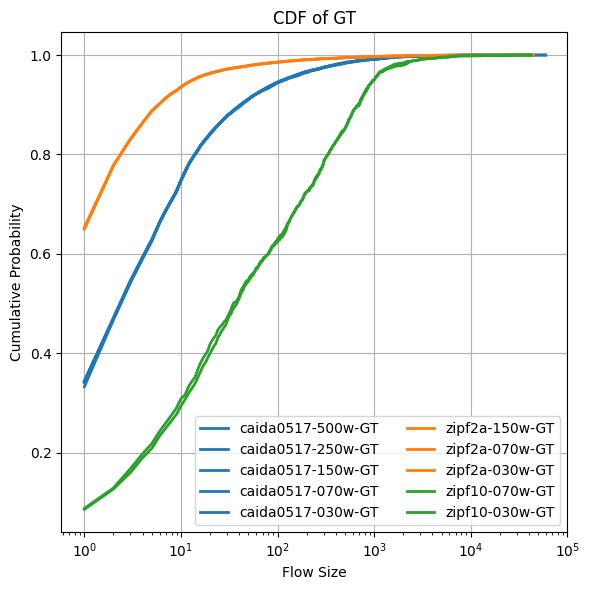

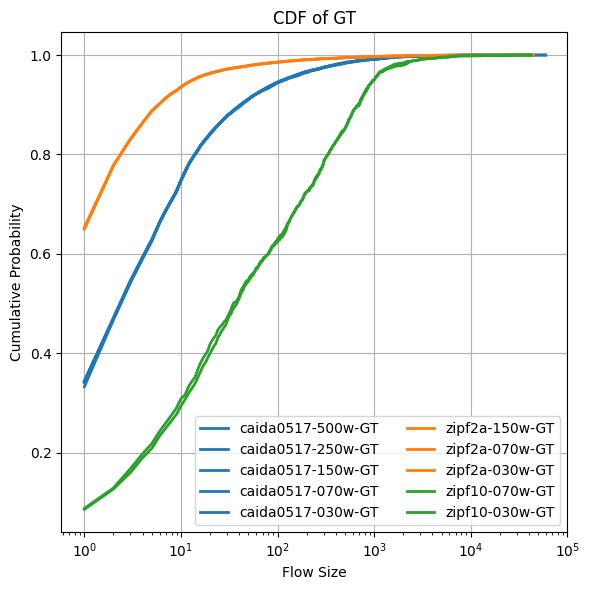

In [55]:
for w in [1024, 2048, 4096, 8192, 16384]:
    plot_fsd(datasets=pcap_file[:10],width=w)